In [1]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations and array operations

# Importing visualization libraries
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For creating attractive and informative statistical graphics


In [2]:
# Importing the yfinance library to fetch stock market data
import yfinance as yf

# Fetching stock data for specific companies
ms = yf.Ticker("MS")  # Morgan Stanley
jpm = yf.Ticker("JPM")  # JPMorgan Chase
gs = yf.Ticker("GS")  # Goldman Sachs
hsbc = yf.Ticker("HSBC")  # HSBC Holdings

In [3]:
# Retrieving historical stock market data for the past 10 years
ms_hist = ms.history(period="10y")
jpm_hist = jpm.history(period="10y")
gs_hist = gs.history(period="10y")
hsbc_hist = hsbc.history(period="10y")

In [4]:
ms_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-12-10 00:00:00-05:00,28.909624,29.046889,28.436821,28.513079,13788700,0.0,0.0
2014-12-11 00:00:00-05:00,28.779980,29.024007,28.444440,28.520700,8942200,0.0,0.0
2014-12-12 00:00:00-05:00,28.025013,28.291917,27.620844,27.643721,10965300,0.0,0.0
2014-12-15 00:00:00-05:00,27.910625,28.078395,27.186171,27.399694,10472000,0.0,0.0
2014-12-16 00:00:00-05:00,27.224300,27.697102,27.033653,27.087034,11456800,0.0,0.0


In [5]:
# Creating a list of historical stock data for easier iteration and processing
stock_list = [ms_hist, jpm_hist, gs_hist, hsbc_hist]

# Creating a list of corresponding stock names for labeling and identification
name_list = ['MS', 'JPM', 'GS', 'HSBC']

In [6]:
# Printing the sum of null values for each stock's historical dat
for i,hist in enumerate(stock_list):
  print(f"sum of null values in {name_list[i]}: \n{hist.isna().sum()}")

sum of null values in MS: 
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
sum of null values in JPM: 
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
sum of null values in GS: 
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
sum of null values in HSBC: 
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [7]:
# Printing the sum of duploicate values for each stock's historical dat
for i,hist in enumerate(stock_list):
  print(f"sum of duplicate values in {name_list[i]}: \n{hist.duplicated().sum()}")

sum of duplicate values in MS: 
0
sum of duplicate values in JPM: 
0
sum of duplicate values in GS: 
0
sum of duplicate values in HSBC: 
0


In [8]:
for i,hist in enumerate(stock_list):
  # Printing descriptive statistics for each stock's historical data
  print(f"Describe {name_list[i]}: \n{hist.describe()}")

Describe MS: 
              Open         High          Low        Close        Volume  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2.516000e+03   
mean     54.462797    55.065917    53.869401    54.465694  1.023482e+07   
std      26.494431    26.761028    26.236633    26.494886  5.097134e+06   
min      16.881695    17.240050    16.484387    16.897276  2.087800e+06   
25%      34.154026    34.525188    33.801145    34.100565  6.908275e+06   
50%      42.513642    42.835896    42.068696    42.364254  8.961350e+06   
75%      80.059540    80.817550    79.053120    79.907238  1.208880e+07   
max     135.440002   136.240005   133.960007   134.990005  5.853350e+07   

         Dividends  Stock Splits  
count  2516.000000        2516.0  
mean      0.007075           0.0  
std       0.065258           0.0  
min       0.000000           0.0  
25%       0.000000           0.0  
50%       0.000000           0.0  
75%       0.000000           0.0  
max       0.925000           0

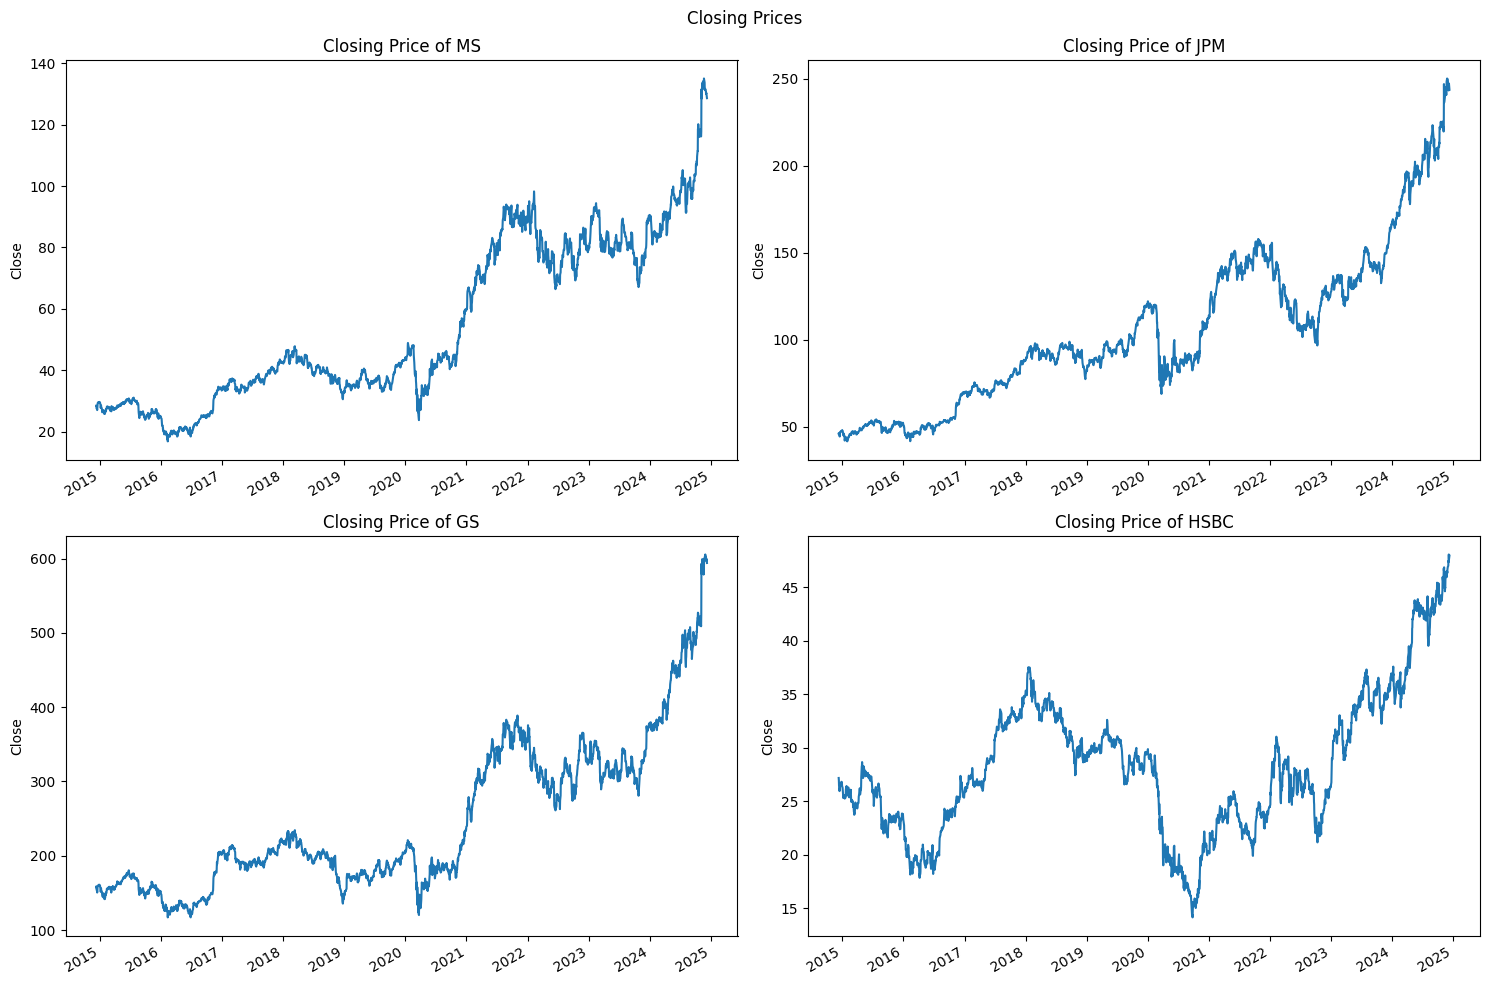

In [9]:
# Plot closing prices for each stock

plt.figure(figsize=(15, 10))

# Adjusting subplot spacing to prevent overlapping
plt.subplots_adjust(top=1.25, bottom=1.2)

# Looping through each company's historical stock data and index
for i, company in enumerate(stock_list, 1):
    plt.subplot(2, 2, i)  # Arranging subplots in a 2x2 grid and assigning each subplot an index

    company['Close'].plot()  # Visualizing the closing prices of the company's stock

    # Adding labels and title for each subplot
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {name_list[i-1]}")

# Adding a title for the entire figure
plt.suptitle("Closing Prices")
plt.tight_layout()  # Automatically adjusts spacing to minimize overlap between subplots


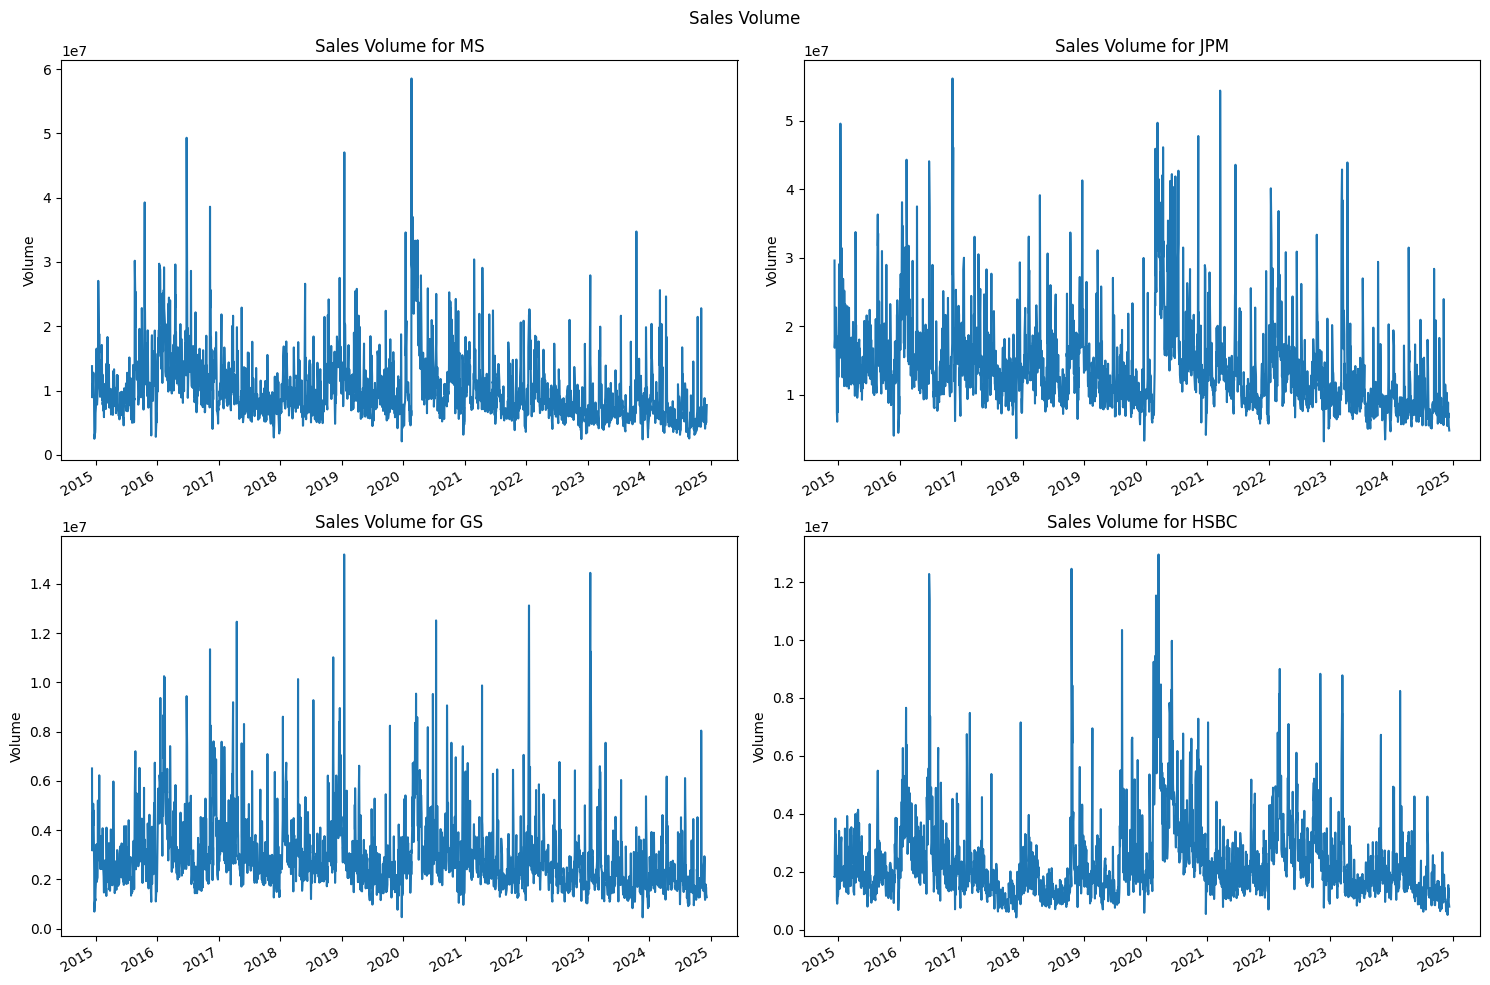

In [10]:
# Plot volume for each stock
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)  # Adjusts spacing at the top and bottom of the figure

# Looping through each company's historical stock data and index
for i, company in enumerate(stock_list, 1):
    plt.subplot(2, 2, i)  # Arranging subplots in a 2x2 grid and assigning each subplot an index

    # Plotting the 'Volume' for the company
    company['Volume'].plot()

    # Adding labels and title for each subplot
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {name_list[i - 1]}")

# Adding a title for the entire figure
plt.suptitle('Sales Volume')


plt.tight_layout()

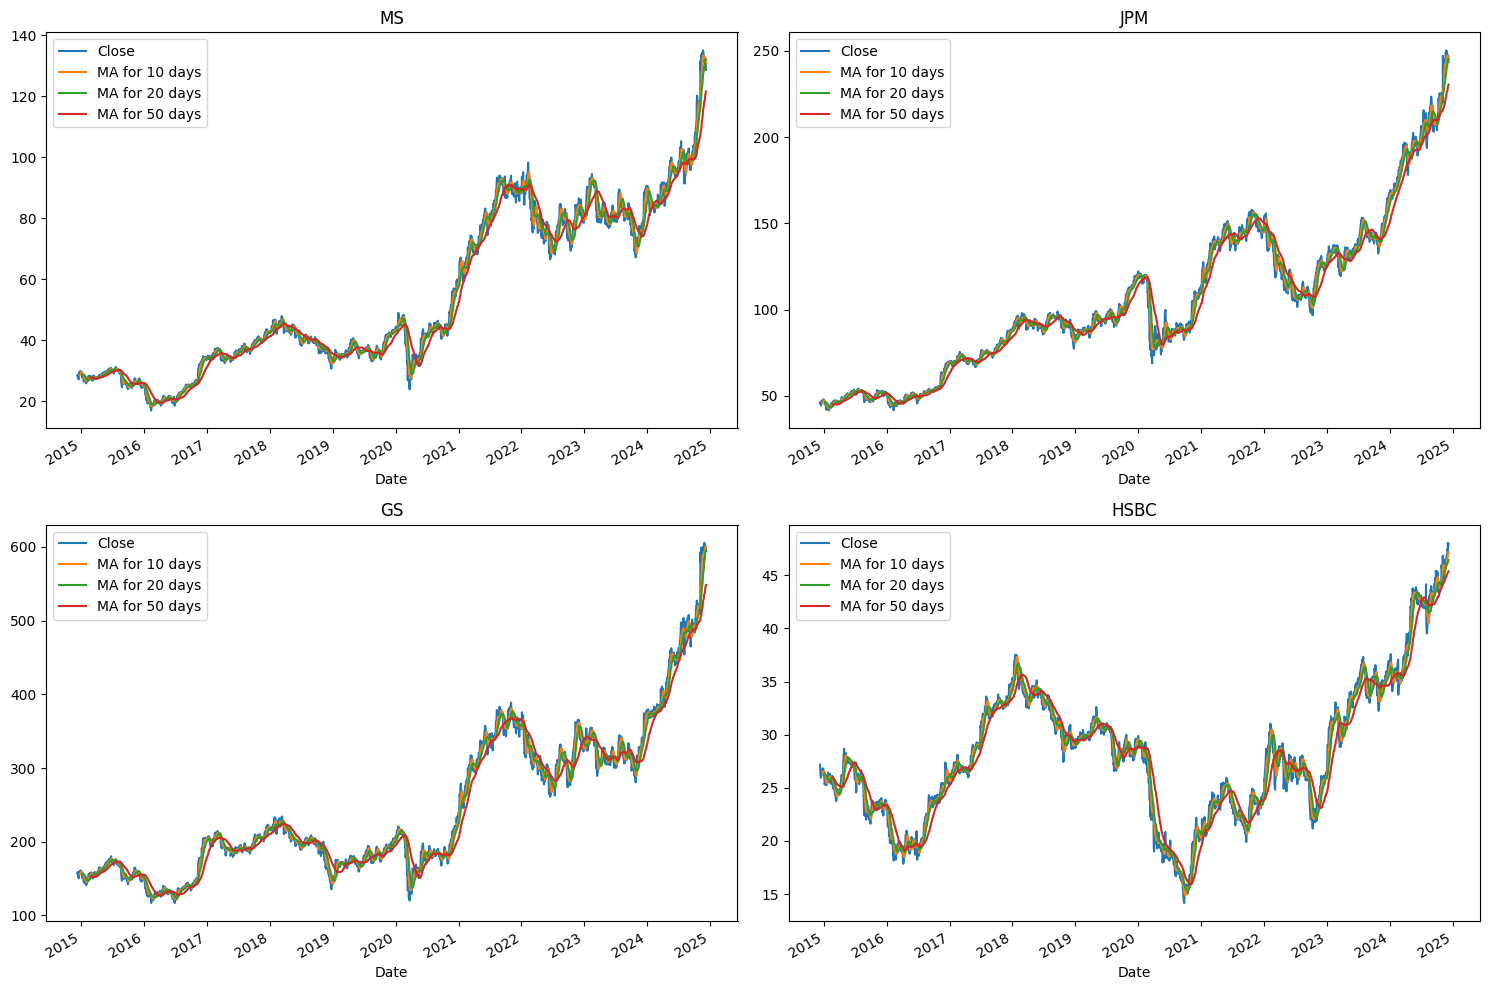

In [11]:
# Calculate and plot moving averages for each stock
ma_day = [10, 20, 50]

# Calculating moving averages for each company
for ma in ma_day:
    for company in stock_list:
        # Creating a new column name for the moving average
        column_name = f"MA for {ma} days"
        # Adding a column to calculate the moving average of the 'Close' price
        company[column_name] = company['Close'].rolling(ma).mean()

# Setting up the plot grid
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)  # Setting the height of the figure
fig.set_figwidth(15)  # Setting the width of the figure
# Plotting the 'Close' price and moving averages for each company
# Morgan Stanley (MS)
ms_hist[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('MS')

# JPMorgan Chase (JPM)
jpm_hist[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('JPM')

# Goldman Sachs (GS)
gs_hist[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('GS')

# HSBC Holdings (HSBC)
hsbc_hist[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('HSBC')

fig.tight_layout()  # Automatically adjusts spacing between subplots
plt.show()

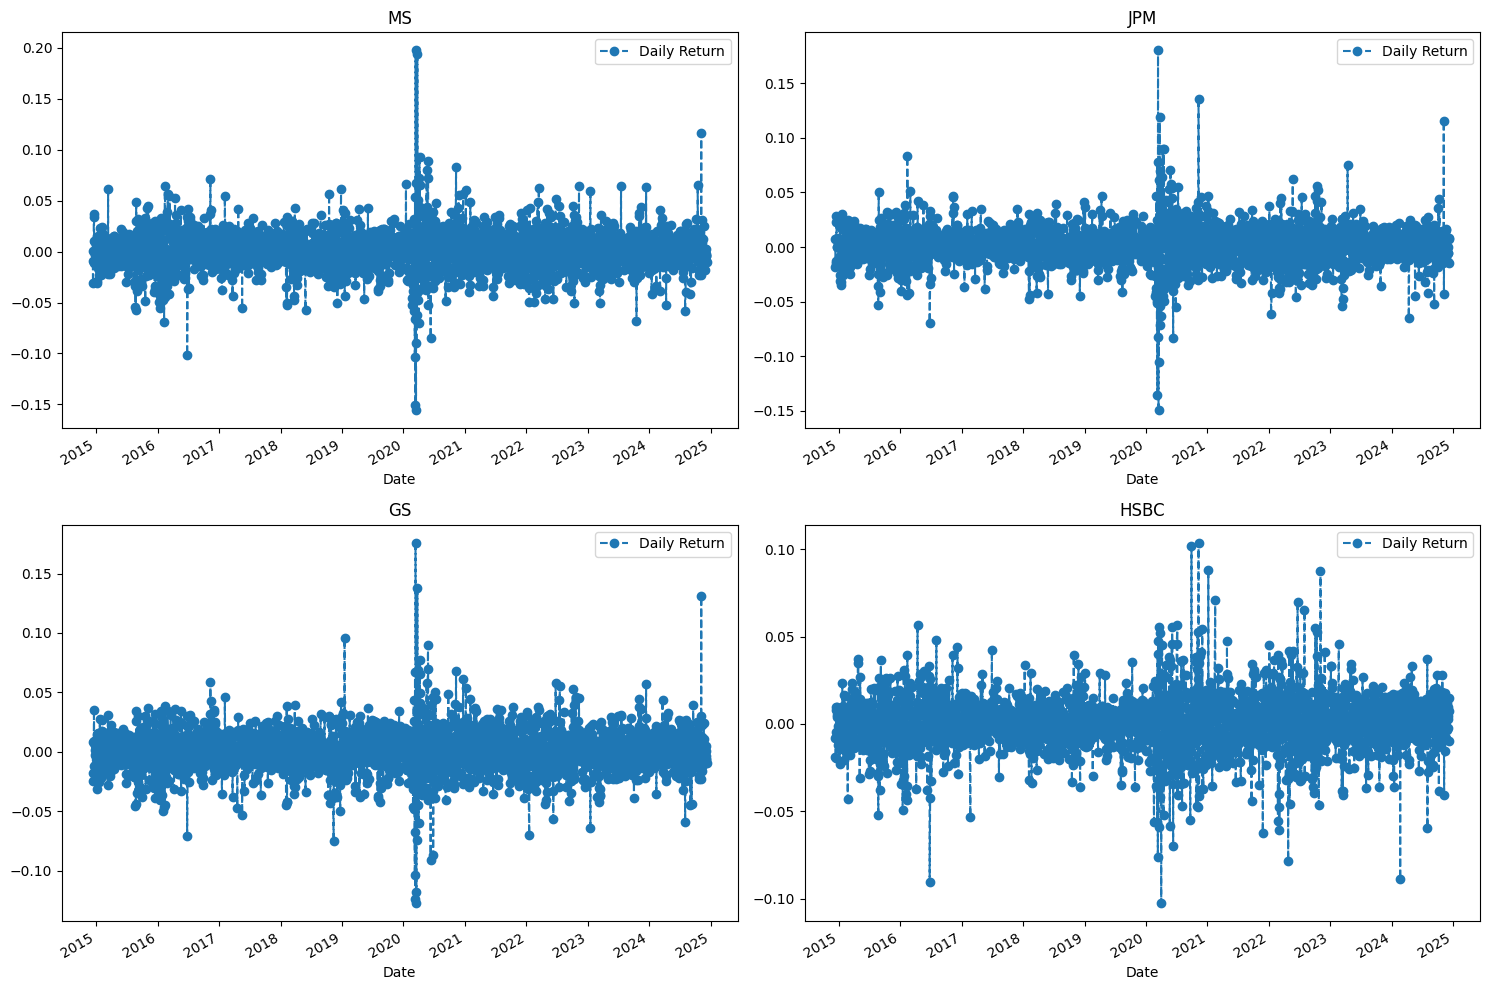

In [12]:
# We'll use pct_change to find the percent change for each day
for company in stock_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
# Plotting daily return percentages for each company
# Morgan Stanley (MS)
ms_hist['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('MS')
# JPMorgan Chase (JPM)
jpm_hist['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('JPM')
# Goldman Sachs (GS)
gs_hist['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('GS')
# HSBC Holdings (HSBC)
hsbc_hist['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('HSBC')

fig.tight_layout() # Automatically adjusts spacing between subplots

In [13]:
ms_hist['Daily Return']

,Daily Return
Date,
2014-12-10 00:00:00-05:00,NaN
2014-12-11 00:00:00-05:00,0.000267
2014-12-12 00:00:00-05:00,-0.030749
2014-12-15 00:00:00-05:00,-0.008828
2014-12-16 00:00:00-05:00,-0.011411
...,...
2024-12-03 00:00:00-05:00,-0.004503
2024-12-04 00:00:00-05:00,-0.003450
2024-12-05 00:00:00-05:00,0.002539


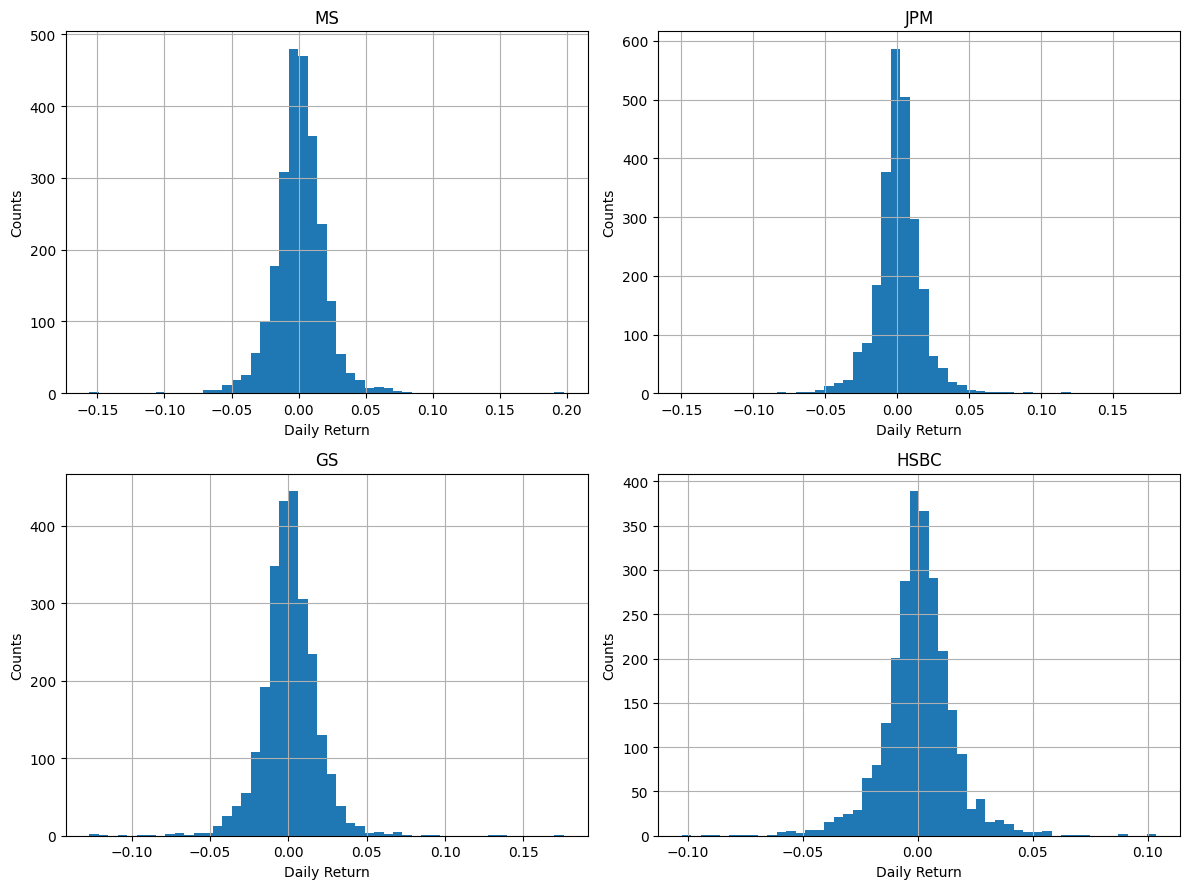

In [14]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(stock_list, 1):

    plt.subplot(2, 2, i)  # Arranging subplots in a 2x2 grid and assigning each subplot an index

    company['Daily Return'].hist(bins=50)  # Creates a histogram with 50 bins for the 'Daily Return'

    # Adding labels and title for the histogram
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{name_list[i - 1]}')


plt.tight_layout()  # Automatically adjusts spacing between subplots


In [15]:
ms_hist.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return'],
      dtype='object')

In [16]:
ms_hist['Date'] = ms_hist.index

In [320]:
dataset = ms_hist[['Close','MA for 10 days', 'MA for 20 days','Date']] # Extracting 'Close', 'MA for 50 days', 'Daily Return' prices
model_data = pd.DataFrame(dataset)
model_data = model_data.dropna() # Removing rows with missing values
model_data = model_data.values # Extracting values as a NumPy array for machine learning models

In [321]:
train_size = int(len(model_data)*.8) # Calculating the size of the training set as 80% of the total data
test_size = len(ms_hist)-train_size # Calculating the size of the test set as the remaining 20% of the data

print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 1997 Test Size : 519


In [322]:
timestep = 60

In [323]:
test_data = model_data[train_size-timestep:,:]  # Selecting data from `train_size - timestep` to the end of the dataset for testing
test_date_or = test_data[:, -1:]

In [324]:
model_data = model_data[:,:-1]

In [325]:
from sklearn.preprocessing import StandardScaler

In [326]:
scaler = StandardScaler()  # Creates an instance of StandardScaler to standardize the dataset
model_data = scaler.fit_transform(model_data)  # Applying the StandardScaler to the dataset

In [327]:
timestep = 60

In [328]:
train_data = model_data[:train_size,:] # Selecting the first `train_size` rows of the dataset for training
test_data = model_data[train_size-timestep:,:]  # Selecting data from `train_size - timestep` to the end of the dataset for testing

In [329]:
train_data.shape, test_data.shape

((1997, 3), (560, 3))

In [330]:
sequence_length = 60

In [331]:
x_train = []
y_train = []
# Creating input and output sequences for the training dataset
for i in range(len(train_data)-timestep):
    x_train.append(train_data[i:i + sequence_length, 1:]) # Appending a sequence of `timestep` rows (input features) to x_train
    y_train.append(train_data[i + sequence_length, 0]) # Appending the target value (next value after the sequence) to y_train

# Converting the lists into NumPy arrays for compatibility with machine learning models
x_train,y_train = np.array(x_train),np.array(y_train)

In [332]:
y_train.shape

(1937,)

In [333]:
x_test = []
y_test = []
# Creating input and output sequences for the training dataset
for i in range(len(test_data)-timestep):
    x_test.append(test_data[i:i + sequence_length, 1:]) # Appending a sequence of `timestep` rows (input features) to x_test
    y_test.append(test_data[i + sequence_length, 0]) # Appending the target value (next value after the sequence) to y_test

# Converting the lists into NumPy arrays for compatibility with machine learning models
x_test, y_test = np.array(x_test), np.array(y_test)

In [334]:
y_train

array([-1.02565067, -1.01641364, -1.00544469, ...,  1.04625078,
        1.07359638,  1.13144273])

In [335]:
x_test.shape,y_test.shape

((500, 60, 2), (500,))

In [283]:
from keras.models import Sequential # Sequential: Allows building a linear stack of layers for the neural network
from keras.callbacks import EarlyStopping # EarlyStopping: Stops training when the model performance stops improving, to prevent overfitting
# LSTM: Long Short-Term Memory layers for handling sequential data
# Dense: Fully connected layers in the neural network
# Dropout: Regularization technique to prevent overfitting by randomly setting some outputs to zero
# BatchNormalization: Normalizes inputs in the network to stabilize and speed up training
# GRU: Gated Recurrent Unit layers, a simpler alternative to LSTM for sequential data
from keras.layers import LSTM,Dense,Dropout,BatchNormalization,GRU
from tensorflow.keras import layers # TensorFlow layers for additional layer customization
# mean_absolute_error: Measures the average magnitude of prediction errors
# mean_squared_error: Measures the average squared differences between predictions and actual values
# r2_score: Indicates how well the predictions fit the actual data, with a value between 0 and 1
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [285]:
# Defining the model using the Sequential API
model = Sequential([
    # Adding a GRU layer with 150 units
    GRU(150, return_sequences= False, input_shape= (x_train.shape[1], 2)), # GRU processes sequential data; input shape indicates sequence length and features
                                                                            # `return_sequences=False` outputs the final hidden state, not the sequence
    Dropout(0.4), # Adding a Dropout layer to prevent overfitting by randomly setting 40% of the neurons to zero
    Dense(64),  # Adding a Dense layer with 64 neurons
    Dropout(0.2),  # Adding another Dropout layer to prevent overfitting, this time with a 20% dropout rate
    Dense(1)   # Adding the final Dense layer with 1 neuron for the output
])
# Compiling the model
model.compile(optimizer= 'adam', loss= 'mse' , metrics= ['mean_absolute_error','r2_score','root_mean_squared_error']) # Using the Adam optimizer for adaptive learning rates

In [286]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_5 (GRU)                          │ (None, 150)                 │          69,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           9,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,029 (308.71 KB)

 Trainable params: 79,029 (308.71 KB)

 Non-trainable params: 0 (0.00 B)

In [287]:
callbacks = [
    EarlyStopping(
        monitor='loss',  # Monitors the training loss during training
        patience=10,  # Stops training if the loss does not improve for 10 consecutive epochs
        restore_best_weights=True  # Restores the weights of the best-performing epoch
    )
]
history = model.fit(
    x_train,  # Input data (training sequences)
    y_train,  # Target values corresponding to the input sequences
    epochs=25,  # Number of epochs to train the model
    batch_size=16,  # Number of samples per gradient update
    callbacks=callbacks  # List of callbacks to monitor and control training
)

Epoch 1/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - loss: 0.1032 - mean_absolute_error: 0.2249 - r2_score: 0.8419 - root_mean_squared_error: 0.3031
Epoch 2/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 15s 110ms/step - loss: 0.0198 - mean_absolute_error: 0.1063 - r2_score: 0.9689 - root_mean_squared_error: 0.1404
Epoch 3/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - loss: 0.0183 - mean_absolute_error: 0.1005 - r2_score: 0.9725 - root_mean_squared_error: 0.1350
Epoch 4/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - loss: 0.0207 - mean_absolute_error: 0.1073 - r2_score: 0.9677 - root_mean_squared_error: 0.1437
Epoch 5/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0161 - mean_absolute_error: 0.0932 - r2_score: 0.9746 - root_mean_squared_error: 0.1267
Epoch 6/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.0163 - mean_absolute_error: 0.0942 - r2_score: 0.9746 - root_mean_squared_error: 0.1275
Epoch 7/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - loss: 0.0140 - mean_absolute_

In [290]:
predicted_prices = model.predict(x_test) # Making predictions on the test dataset

predicted_prices = predicted_prices.reshape(-1, 1) # Reshaping the predictions into a column vector
# Preparing dummy features for inverse scaling
num_samples = predicted_prices.shape[0]
dummy_features = np.zeros((num_samples, 2)) # Creates a placeholder array with three columns filled with zeros
predicted_full = np.concatenate((dummy_features, predicted_prices), axis=1) # Concatenating dummy features with the predicted prices
predicted_prices_inversed = scaler.inverse_transform(predicted_full)[:, -1] # Applying the inverse transformation to convert scaled predictions back to the original scale

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step


In [292]:
original_prices = y_test.reshape(-1, 1) # Reshaping the predictions into a column vector
# Preparing dummy features for inverse scaling
num_samples = original_prices.shape[0]
dummy_features = np.zeros((num_samples, 2)) # Creates a placeholder array with three columns filled with zeros
original_full = np.concatenate((dummy_features, original_prices), axis=1)  # Concatenating dummy features with the original prices
original_prices_inversed = scaler.inverse_transform(original_full)[:, -1]  # Applying the inverse transformation to convert scaled prices back to the original scale


In [293]:
print("Evaluation Metrics for GRU Model:\n")
print(f"Mean Absolute Error: {mean_absolute_error(original_prices_inversed, predicted_prices_inversed)}") # MAE measures the average magnitude of errors between predicted and actual values
print(f"Mean Squared Error: {mean_squared_error(original_prices_inversed, predicted_prices_inversed)}") # MSE penalizes larger errors more than smaller ones by squaring the differences
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(original_prices_inversed, predicted_prices_inversed))}") # RMSE is the square root of MSE, giving an error metric in the same units as the data
print(f"R2 Score: {r2_score(original_prices_inversed, predicted_prices_inversed)}") # R2 indicates the proportion of variance in the target variable explained by the model

Evaluation Metrics for GRU Model:

Mean Absolute Error: 2.2691030488114765
Mean Squared Error: 8.929464244805057
Root Mean Squared Error: 2.988220916332167
R2 Score: 0.9494287742174737


In [294]:
test_date = test_date_or[60:,:]

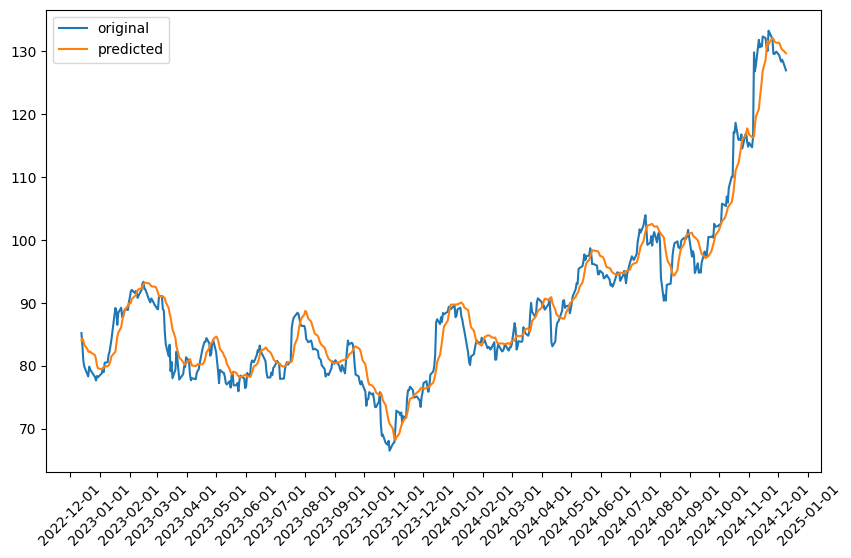

In [295]:
import matplotlib.dates as mdates
#plot original vs predicted
plt.figure(figsize=(10,6))
plt.plot(test_date.flatten(), original_prices_inversed, label = 'original') # Plots the actual prices
plt.plot(test_date.flatten(), predicted_prices_inversed, label = 'predicted') # Plots the model's predictions
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format dates as 'YYYY-MM-DD'
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Display ticks at the start of each month
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend() # Adding a legend to differentiate between the original and predicted prices
plt.show()

In [301]:
Model_lstm = Sequential() # Defining an LSTM-based sequential model
Model_lstm.add(LSTM(units = 100, return_sequences = True, input_shape = (x_train.shape[1],2))) # Adding the first LSTM layer with 100 units
Model_lstm.add(Dropout(0.2))  # 20% of neurons are randomly deactivated during training
Model_lstm.add(LSTM(units = 100, return_sequences = True)) # Adding a second LSTM layer with 100 units
Model_lstm.add(Dropout(0.2)) # Adding another Dropout layer
Model_lstm.add(LSTM(units = 100, return_sequences = True)) # Adding a third LSTM layer with 100 units
Model_lstm.add(Dropout(0.2))  # Adding another Dropout layer
Model_lstm.add(layers.LSTM(units = 100, return_sequences = False)) # Adding the final LSTM layer
Model_lstm.add(layers.Dropout(rate = 0.2)) # Adding a Dropout layer for regularization
Model_lstm.add(layers.Dense(units = 25)) # Reduces the dimensionality before the final output layer
Model_lstm.add(layers.Dense(units = 1)) # Adding another Dense layer with 1 unit (for output)
Model_lstm.add(Dense(units = 1)) # Adding a duplicate Dense layer with 1 unit (likely redundant)
Model_lstm.summary() # Printing the model summary

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 60, 100)             │          41,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 284,953 (1.09 MB)

 Trainable params: 284,953 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

In [302]:
# Compiling the model
Model_lstm.compile(optimizer= 'adam', loss = 'mean_squared_error', metrics =['mean_absolute_error','r2_score','root_mean_squared_error'])  # Using the Adam optimizer for adaptive learning rates

In [304]:
history_lstm = Model_lstm.fit(
    x_train,  # Training input data (sequences)
    y_train,  # Target output values corresponding to the sequences
    epochs=15,  # Number of complete passes through the training dataset
    batch_size=16  # Number of samples per gradient update
)

Epoch 1/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 29s 201ms/step - loss: 0.1003 - mean_absolute_error: 0.2216 - r2_score: 0.8446 - root_mean_squared_error: 0.2979
Epoch 2/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 40s 195ms/step - loss: 0.0243 - mean_absolute_error: 0.1179 - r2_score: 0.9591 - root_mean_squared_error: 0.1560
Epoch 3/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 42s 203ms/step - loss: 0.0217 - mean_absolute_error: 0.1111 - r2_score: 0.9650 - root_mean_squared_error: 0.1471
Epoch 4/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 40s 195ms/step - loss: 0.0211 - mean_absolute_error: 0.1071 - r2_score: 0.9671 - root_mean_squared_error: 0.1452
Epoch 5/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 199ms/step - loss: 0.0190 - mean_absolute_error: 0.1048 - r2_score: 0.9685 - root_mean_squared_error: 0.1378
Epoch 6/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 181ms/step - loss: 0.0254 - mean_absolute_error: 0.1221 - r2_score: 0.9596 - root_mean_squared_error: 0.1587
Epoch 7/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 40s 177ms/step - loss: 0.0187 - mean_absol

In [305]:
predicted_prices = Model_lstm.predict(x_test) # Making predictions on the test dataset

predicted_prices = predicted_prices.reshape(-1, 1) # Reshaping the predictions into a column vector
# Preparing dummy features for inverse scaling
num_samples = predicted_prices.shape[0]
dummy_features = np.zeros((num_samples, 2)) # Creates a placeholder array with three columns filled with zeros
predicted_full = np.concatenate((dummy_features, predicted_prices), axis=1)  # Concatenating dummy features with the predicted prices
predicted_prices_inversed_lstm = scaler.inverse_transform(predicted_full)[:, -1] # Applying the inverse transformation to convert scaled predictions back to the original scale

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step


In [306]:
print("Evaluation Metrics for LSTM Model:\n")
print(f"Mean Absolute Error: {mean_absolute_error(original_prices_inversed, predicted_prices_inversed_lstm)}") # MAE measures the average magnitude of errors between predicted and actual values
print(f"Mean Squared Error: {mean_squared_error(original_prices_inversed, predicted_prices_inversed_lstm)}") # MSE penalizes larger errors more than smaller ones by squaring the differences
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(original_prices_inversed, predicted_prices_inversed_lstm))}") # RMSE is the square root of MSE, giving an error metric in the same units as the data
print(f"R2 Score: {r2_score(original_prices_inversed, predicted_prices_inversed_lstm)}") # R2 indicates the proportion of variance in the target variable explained by the model

Evaluation Metrics for LSTM Model:

Mean Absolute Error: 5.167177966906472
Mean Squared Error: 60.88159729766759
Root Mean Squared Error: 7.802666037814741
R2 Score: 0.6552024938413981


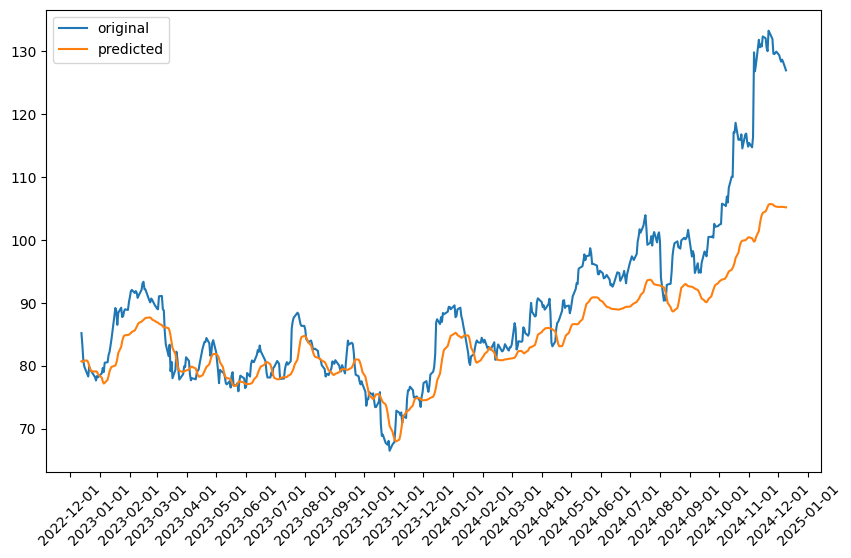

In [307]:
#plot original vs predicted
plt.figure(figsize=(10,6))
plt.plot(test_date.flatten(), original_prices_inversed, label = 'original') # Plots the actual prices
plt.plot(test_date.flatten(), predicted_prices_inversed_lstm, label = 'predicted') # Plots the model's predictions
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format dates as 'YYYY-MM-DD'
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Display ticks at the start of each month
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend() # Adding a legend to differentiate between the original and predicted prices
plt.show()

In [308]:
x_train_ln = train_data[:,1:] # Selecting all rows and columns starting from the second column onward
y_train_ln = train_data[:,0] # Selecting all rows and the first column as the target

In [309]:
x_test_ln = test_data[:,1:] # Selecting all rows and columns starting from the second column onward
y_test_ln = test_data[:,0] # Selecting all rows and the first column as the target

In [310]:
from sklearn.linear_model import LinearRegression # Importing the LinearRegression class from scikit-learn
lm=LinearRegression() # Creating an instance of the LinearRegression model
lm.fit(x_train,y_train) # Fitting the linear regression model to the training data

LinearRegression()

In [311]:
lm.score(x_train,y_train)

0.9949485269403145

In [312]:
predictions_ln = lm.predict(x_test) #making prediction test data

In [313]:
predicted_prices = predictions_ln.reshape(-1, 1) # Reshaping predicted prices into a column vector
# Preparing dummy features for inverse scaling
num_samples = predicted_prices.shape[0]
dummy_features = np.zeros((num_samples, 2)) # Creates a placeholder array with three columns filled with zeros
predicted_full = np.concatenate((dummy_features, predicted_prices), axis=1) # Concatenating dummy features with the predicted prices
predicted_prices_inversed_ln = scaler.inverse_transform(predicted_full)[:, -1] # Applying the inverse transformation to convert scaled predictions back to the original scale

In [314]:
original_prices_ln = y_test.reshape(-1, 1) # Reshaping predicted prices into a column vector
# Preparing dummy features for inverse scaling
num_samples = original_prices_ln.shape[0]
dummy_features = np.zeros((num_samples, 2)) # Creates a placeholder array with three columns filled with zeros
original_full = np.concatenate((dummy_features, original_prices_ln), axis=1) # Concatenating dummy features with the predicted prices
original_prices_inversed_ln = scaler.inverse_transform(original_full)[:, -1] # Applying the inverse transformation to convert scaled predictions back to the original scale

In [315]:
print("Evaluation Metrics for Linear Regression Model:\n")
print(f"Mean Absolute Error: {mean_absolute_error(original_prices_inversed_ln, predicted_prices_inversed_ln)}") # MAE measures the average magnitude of errors between predicted and actual values
print(f"Mean Squared Error: {mean_squared_error(original_prices_inversed_ln, predicted_prices_inversed_ln)}") # MSE penalizes larger errors more than smaller ones by squaring the differences
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(original_prices_inversed_ln, predicted_prices_inversed_ln))}") # RMSE is the square root of MSE, giving an error metric in the same units as the data
print(f"R2 Score: {r2_score(original_prices_inversed_ln, predicted_prices_inversed_ln)}") # R2 indicates the proportion of variance in the target variable explained by the model

Evaluation Metrics for Linear Regression Model:

Mean Absolute Error: 1.876418813084669
Mean Squared Error: 6.018663543262775
Root Mean Squared Error: 2.4532964646089503
R2 Score: 0.9651862215165474


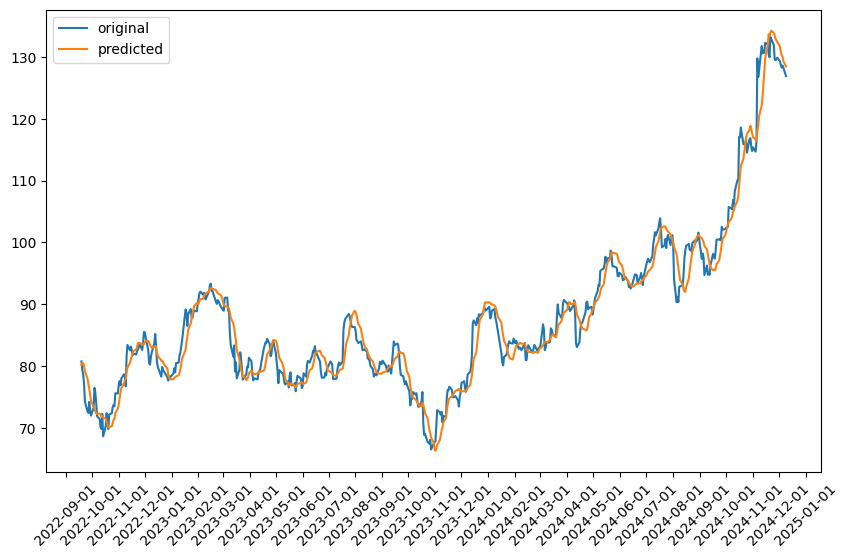

In [316]:
#plot original vs predicted
plt.figure(figsize=(10,6))
plt.plot(test_date_or,original_prices_inversed_ln, label = 'original') # Plots the actual prices
plt.plot(test_date_or,predicted_prices_inversed_ln, label = 'predicted') # Plots the model's predictions
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format dates as 'YYYY-MM-DD'
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Display ticks at the start of each month
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()  # Adding a legend to differentiate between the original and predicted prices
plt.show()

In [317]:
x_test.shape

(560, 2)

# **Future Prediction**

In [336]:
def forecast_future(model, days, sequence_length=50):
    # Start with the last available sequence
    recent_sequence = x_test[-10:, :]  # Ensure the correct slicing
    close_prices = x_test[:, 0].flatten().tolist()
    predictions = []
    #print(recent_sequence)
    for _ in range(days):
        # Reshape recent_sequence to match model's input requirements
      # Shape: (1, sequence_length, num_features)

      # Predict the next value
        next_pred = model.predict(recent_sequence)[0, 0]  # Extract the predicted value
        predictions.append(next_pred)

        # Update Close prices with the predicted value
        close_prices.append(float(next_pred))

        # Calculate moving averages using the updated Close prices
        ma10 = np.mean(close_prices[-10:]) if len(close_prices) >= 10 else np.mean(close_prices)
        ma20 = np.mean(close_prices[-20:]) if len(close_prices) >= 20 else np.mean(close_prices)
        #ma50 = np.mean(close_prices[-50:]) if len(close_prices) >= 50 else np.mean(close_prices)

        # Construct the next_features based on the moving averages
        next_features = np.array([ma10, ma20]).reshape(1, -1)  # Shape: (1, 3)

        # Reshape next_features to align with recent_sequence structure
        next_features = np.repeat(next_features, 60, axis=0).reshape(1, 60, 2)  # Shape: (1, 60, 2)

        # Concatenate to update recent_sequence
        recent_sequence = np.concatenate([recent_sequence[1:], next_features], axis=0)  # Along time axis

    return predictions

In [337]:
future_predictions = forecast_future(model, days=7)
print(future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[2.988309, 2.9821308, 2.9667566, 2.9588945, 2.9574146, 2.9430342, 2.9257748]


In [338]:
future_predictions = np.array(future_predictions)
predicted_prices = future_predictions.reshape(-1, 1) # Reshaping the predictions into a column vector
# Preparing dummy features for inverse scaling
num_samples = predicted_prices.shape[0]
dummy_features = np.zeros((num_samples, 2)) # Creates a placeholder array with three columns filled with zeros
predicted_full = np.concatenate((dummy_features, predicted_prices), axis=1) # Concatenating dummy features with the predicted prices
predicted_prices_inversed = scaler.inverse_transform(predicted_full)[:, -1] # Applying the inverse transformation to convert scaled predictions back to the original scale

In [339]:
predicted_prices_inversed

array([132.07096795, 131.91012308, 131.50986375, 131.30517806,
       131.26665052, 130.89226242, 130.44292346])

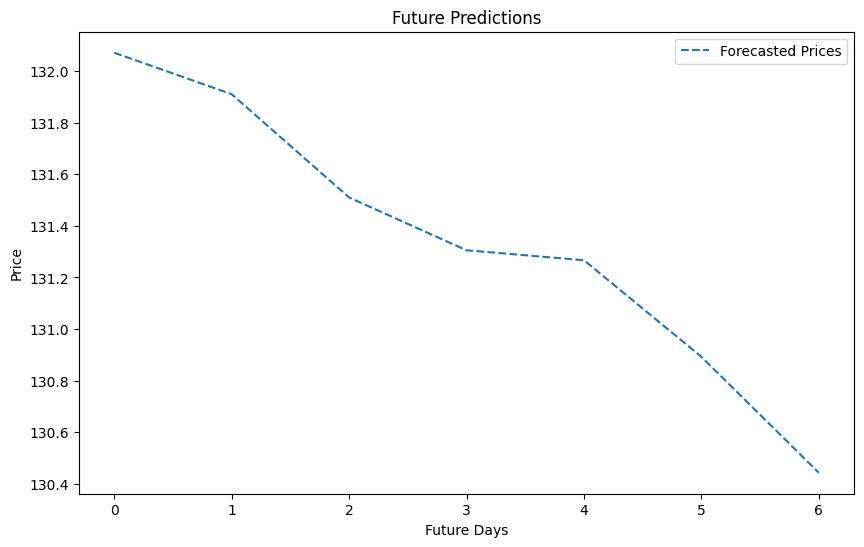

In [340]:
# Plot future predictions
plt.figure(figsize=(10, 6))
plt.plot(predicted_prices_inversed, label='Forecasted Prices', linestyle='--')
plt.title("Future Predictions")
plt.xlabel("Future Days")
plt.ylabel("Price")
plt.legend()
plt.show()